In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

import numpy as np
import sys, pickle, os, torch, cv2
# replace this path with path to GMIC
sys.path.append("/workspace/src/modeling")

from src.data_loading import loading
from src.modeling import gmic as gmic

### You need to obtain the cropped images (bash run.sh) before using this demo.

Step 1: prepare the input data

In [2]:
print(os.getcwd())

/workspace


In [3]:
# Modified
with open("sample_data/exam_list_before_cropping.pkl", "rb") as f:
    exam_list = pickle.load(f)
datum = exam_list[3]
view = "L-CC"
short_file_path = datum[view][0]

In [4]:
# See what you loaded
print(f"Number of exams: {len(exam_list)}")
print(f"Exam 3 keys: {list(datum.keys())}")
print(f"View {view}: {datum[view]}")
print(f"Short file path: {short_file_path}")

# Explore the exam structure
print(f"\nExam 3 structure:")
for key, value in datum.items():
    print(f"  {key}: {value}")

Number of exams: 4
Exam 3 keys: ['horizontal_flip', 'L-CC', 'L-MLO', 'R-MLO', 'R-CC', 'cancer_label', 'L-CC_benign_seg', 'L-CC_malignant_seg', 'L-MLO_benign_seg', 'L-MLO_malignant_seg', 'R-MLO_benign_seg', 'R-MLO_malignant_seg', 'R-CC_benign_seg', 'R-CC_malignant_seg']
View L-CC: ['3_L-CC']
Short file path: 3_L-CC

Exam 3 structure:
  horizontal_flip: NO
  L-CC: ['3_L-CC']
  L-MLO: ['3_L-MLO']
  R-MLO: ['3_R-MLO']
  R-CC: ['3_R-CC']
  cancer_label: {'benign': 0, 'right_benign': 0, 'malignant': 1, 'left_benign': 0, 'unknown': 0, 'right_malignant': 0, 'left_malignant': 1}
  L-CC_benign_seg: ['3_L-CC_benign']
  L-CC_malignant_seg: ['3_L-CC_malignant']
  L-MLO_benign_seg: ['3_L-MLO_benign']
  L-MLO_malignant_seg: ['3_L-MLO_malignant']
  R-MLO_benign_seg: ['3_R-MLO_benign']
  R-MLO_malignant_seg: ['3_R-MLO_malignant']
  R-CC_benign_seg: ['3_R-CC_benign']
  R-CC_malignant_seg: ['3_R-CC_malignant']


In [5]:
with open("sample_output/data.pkl", "rb") as f:
    exam_list = pickle.load(f)
datum = exam_list[3]
view = "L-CC"
short_file_path = datum[view][0]

In [6]:
# See what you loaded
print(f"Number of exams: {len(exam_list)}")
print(f"Exam 3 keys: {list(datum.keys())}")
print(f"View {view}: {datum[view]}")
print(f"Short file path: {short_file_path}")

# Explore the exam structure
print(f"\nExam 3 structure:")
for key, value in datum.items():
    print(f"  {key}: {value}")

Number of exams: 4
Exam 3 keys: ['horizontal_flip', 'L-CC', 'L-MLO', 'R-MLO', 'R-CC', 'cancer_label', 'L-CC_benign_seg', 'L-CC_malignant_seg', 'L-MLO_benign_seg', 'L-MLO_malignant_seg', 'R-MLO_benign_seg', 'R-MLO_malignant_seg', 'R-CC_benign_seg', 'R-CC_malignant_seg', 'window_location', 'rightmost_points', 'bottommost_points', 'distance_from_starting_side', 'best_center']
View L-CC: ['3_L-CC']
Short file path: 3_L-CC

Exam 3 structure:
  horizontal_flip: NO
  L-CC: ['3_L-CC']
  L-MLO: ['3_L-MLO']
  R-MLO: ['3_R-MLO']
  R-CC: ['3_R-CC']
  cancer_label: {'benign': 0, 'right_benign': 0, 'malignant': 1, 'left_benign': 0, 'unknown': 0, 'right_malignant': 0, 'left_malignant': 1}
  L-CC_benign_seg: ['3_L-CC_benign']
  L-CC_malignant_seg: ['3_L-CC_malignant']
  L-MLO_benign_seg: ['3_L-MLO_benign']
  L-MLO_malignant_seg: ['3_L-MLO_malignant']
  R-MLO_benign_seg: ['3_R-MLO_benign']
  R-MLO_malignant_seg: ['3_R-MLO_malignant']
  R-CC_benign_seg: ['3_R-CC_benign']
  R-CC_malignant_seg: ['3_R-CC_m

Step 2: load the image

In [7]:
loaded_image = loading.load_image(
                    image_path=os.path.join("sample_output/cropped_images/", short_file_path + ".png"),
                    view=view, horizontal_flip=datum["horizontal_flip"])

Step 3: preprocess the image

In [8]:
loaded_image = loading.process_image(loaded_image, view, datum["best_center"][view][0])

Let's visualize a sample image

(2944, 1920)


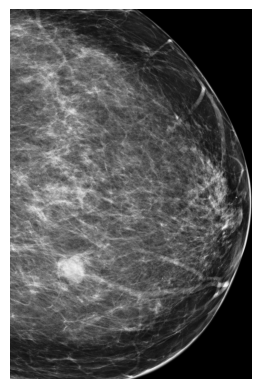

In [9]:
print(loaded_image.shape)
plt.imshow(loaded_image, cmap="Greys_r")
plt.axis("off")
plt.show()

Step 4: load the model

In [10]:
parameters = {
        "device_type":"cpu",
        "cam_size": (46, 30),
        "K": 6,
        "crop_shape": (256, 256),
        "percent_t":0.02,
        "post_processing_dim": 256,
        "num_classes": 2
    }

In [11]:
model = gmic.GMIC(parameters)

In [12]:
model.load_state_dict(torch.load("models/sample_model_1.p", map_location="cpu"), strict=False)

/tmp/ipykernel_1066/1251010301.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/sample_model_1.p", map_location="cpu"), strict=Fa

_IncompatibleKeys(missing_keys=[], unexpected_keys=['shared_rep_filter.weight'])

Step 5: inference

In [13]:
tensor_batch = torch.Tensor(np.expand_dims(np.expand_dims(loaded_image, 0), 0).copy())
output = model(tensor_batch)
pred_numpy = output.data.cpu().numpy()
malignant_pred = pred_numpy[0, 1]

In [14]:
print("malignant prediction = {}".format(malignant_pred))

malignant prediction = 0.2067280262708664


Step 6: visualize the saliency map

/tmp/ipykernel_1066/33741489.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  alpha_red = plt.cm.get_cmap('Reds')


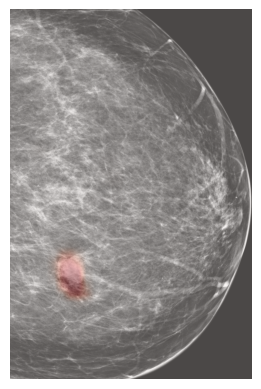

In [15]:
saliency_maps = model.saliency_map.data.cpu().numpy()
malignant_saliency_map = saliency_maps[0,1,:,:]
alphas = np.abs(np.linspace(0, 0.95, 259))
alpha_red = plt.cm.get_cmap('Reds')
plt.figure()
plt.imshow(loaded_image, cmap="Greys_r")
plt.imshow(cv2.resize(malignant_saliency_map, (1920, 2944)), alpha=0.3, cmap=alpha_red, clim=[0.0, 1.0])
plt.axis("off")
plt.show()